Note: This protocol, although it wraps information into qubits (quantum states), essentially still runs entirely on a classical communication channel. This is because of the two communication processes that are side by side, the first process of information transmission with qubits is carried out by Alice by encoding information on photon qubits, then the photons are sent in a classical communication channel to Bob. For example, via fiber optics or other photon transmissions that are limited by the speed of light (classical). The second process is also classical because Alice and Bob share quantum operators to find keys through a classical channel (for example, Alice calls Bob).

In [1]:
import cirq
import numpy as np
from cirq.contrib.svg import SVGCircuit
from IPython.display import display

In [4]:
def random_bits(n):
    return np.random.randint(2, size=n)

def random_bases(n):
    return np.random.randint(2, size=n)

def encode_message(bits, bases):
    qubits = [cirq.GridQubit(0,i) for i in range(len(bits))]
    circuit = cirq.Circuit()

    for i, (bit, base) in enumerate(zip(bits, bases)):
        if bit == 1:
            circuit.append(cirq.X(qubits[i]))
        if base == 1:
            circuit.append(cirq.H(qubits[i]))

    return qubits, circuit

def measure_message(qubits, bases):
    circuit = cirq.Circuit()

    for i, base in enumerate(bases):
        if base == 1:
            circuit.append(cirq.H(qubits[i]))
        circuit.append(cirq.measure(qubits[i], key=f'q{i}'))

    return circuit

def simulate(circuit):
    simulator = cirq.Simulator()
    results = simulator.run(circuit)
    return results

In [9]:
# Simulate BB84 protocol
n= 10 #Number of qubits

# Step 1: Alice creates random bits and bases
alice_bits = random_bits(n)
alice_bases = random_bases(n)

# Step 2: Alice encodes her bits
qubits, alice_circuit = encode_message(alice_bits, alice_bases)

# Step 3: Bob chooses random base
bob_bases = random_bases(n)

# Step 4: Bob measures the received qubits
bob_circuit = measure_message(qubits, bob_bases)

# Combine Alice's and Bob's circuits
full_circuit = alice_circuit + bob_circuit
print("Circuit:")
print(full_circuit)

Circuit:
(0, 0): ───X───────H─────────M('q0')───

(0, 1): ───X───────H─────────M('q1')───

(0, 2): ───────────H─────────M('q2')───

(0, 3): ───────────H─────────M('q3')───

(0, 4): ───X───────M('q4')─────────────

(0, 5): ───────────M('q5')─────────────

(0, 6): ───X───H───H─────────M('q6')───

(0, 7): ───H───────H─────────M('q7')───

(0, 8): ───H───────H─────────M('q8')───

(0, 9): ───H───────H─────────M('q9')───


In [14]:
# Step 5: Simulate the circuit
result = simulate(full_circuit)
print("Results:")
print(result)

# Extract Bob's measurements
bob_bits = [result.measurements[f'q{i}'][0] for i in range(n)]

# Step 6: Alice and Bob compare bases and extract the key
key = [alice_bits[i] for i in range(n) if alice_bases[i] == bob_bases[i]]
print("Alice's bits:", alice_bits)
print("Alice's bases:", alice_bases)
print("Bob's bases:", bob_bases)
print("Bob's bits:", bob_bits)
print("Key:", key)

Results:
q0=0
q1=1
q2=1
q3=1
q4=1
q5=0
q6=1
q7=0
q8=0
q9=0
Alice's bits: [1 1 0 0 1 0 1 0 0 0]
Alice's bases: [0 0 0 0 0 0 1 1 1 1]
Bob's bases: [1 1 1 1 0 0 1 1 1 1]
Bob's bits: [array([0], dtype=int8), array([1], dtype=int8), array([1], dtype=int8), array([1], dtype=int8), array([1], dtype=int8), array([0], dtype=int8), array([1], dtype=int8), array([0], dtype=int8), array([0], dtype=int8), array([0], dtype=int8)]
Key: [1, 0, 1, 0, 0, 0]


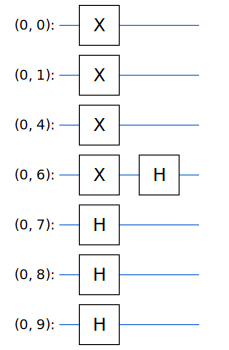

In [17]:
# Draw the circuit as SVG and display it
svg_circuit = SVGCircuit(alice_circuit)
display(svg_circuit)  

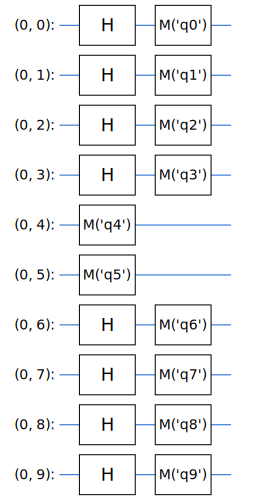

In [18]:
# Draw the circuit as SVG and display it
svg_circuit = SVGCircuit(bob_circuit)
display(svg_circuit)

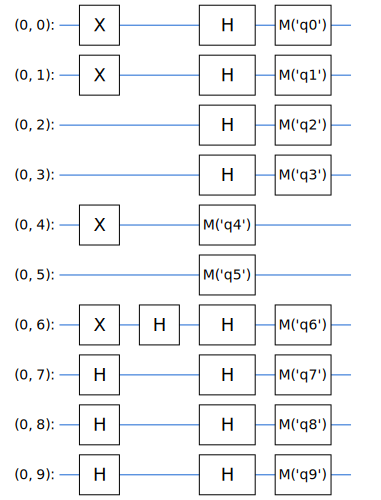

In [20]:
# Draw the circuit as SVG and display it
svg_circuit = SVGCircuit(full_circuit)
display(svg_circuit)

# Save the circuit diagram as SVG
with open("exports/bb84_circuit.svg", "w", encoding='utf-8') as file:
    file.write(str(svg_circuit))